# Import data 

In [15]:
train_set.columns

Index(['Unnamed: 0', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis', 'id'],
      dtype='object')

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection, metrics, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import svm

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# import normalized and scaled data
train_set = pd.read_csv('../data/data_train_scaled.csv')
test_set = pd.read_csv('../data/data_test_scaled.csv')

# Split x and y for train and test data


In [3]:

# split x and y for test and training data
x_train = train_set.drop(['Unnamed: 0' ,'diagnosis','id'], axis=1)
y_train = train_set['diagnosis']

x_test = test_set.drop(['Unnamed: 0','diagnosis','id'], axis=1)
y_test = test_set['diagnosis']

# classificaiton 0 and 1
y_test = y_test.map({'M': 1,'B': 0})
y_train = y_train.map({'M': 1,'B': 0})

# Grid search 

In [4]:
#model
model= svm.SVC()

In [5]:

# grid search parameter
C_range= 10. ** np.arange(-5, 15)
gamma_range = 10. **np.arange(-15,3)

# parameter dict
para_grid = {'C': C_range, 'gamma' :gamma_range}

#cross validation gridsearch
grid = GridSearchCV(model, para_grid, cv=5, scoring='accuracy')

# fit data to grid
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05,   1.00000e+06,
         1.00000e+07,   1.00000e+08,   1.00000e+09,   1.00000e+10,
         1.0000...    1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [6]:
print(grid.best_score_)
print(grid.best_params_)

0.975824175824
{'C': 100.0, 'gamma': 0.001}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


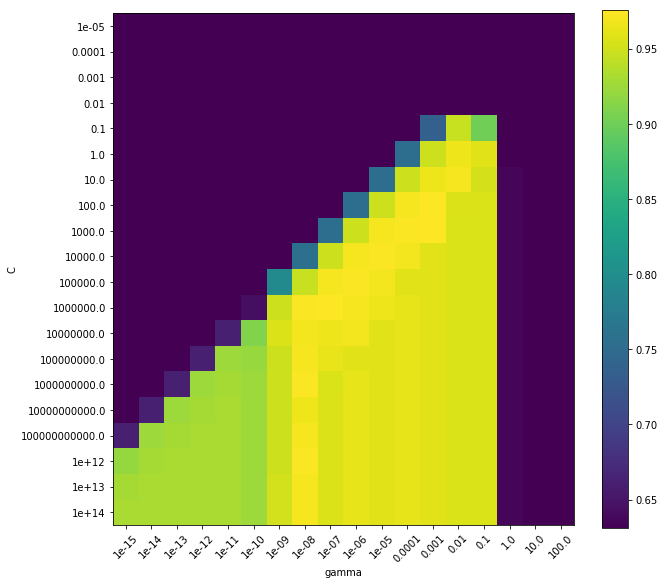

In [7]:
# Get just the scores
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
grid_fig = plt.figure(figsize=(10, 9))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

grid_fig.savefig('grid_search_SVM',bbox_inches='tight')

# Train model on best parameters

In [8]:
# model with parameters
SVM_model = svm.SVC(C= 100, gamma = 0.001)
SVM_model.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Prediction

In [11]:
#predict y
y_predict = SVM_model.predict(x_test)

# Scores

In [12]:
#accuracy score 
print('accuracy: ',metrics.accuracy_score(y_test, y_predict))
print('recall: ',metrics.recall_score(y_test, y_predict))
print('precision: ',metrics.precision_score(y_test,y_predict))

accuracy:  0.982456140351
recall:  0.954545454545
precision:  1.0


In [13]:
metrics.confusion_matrix(y_test,y_predict)

array([[70,  0],
       [ 2, 42]], dtype=int64)

# Plot ROC curve SVM

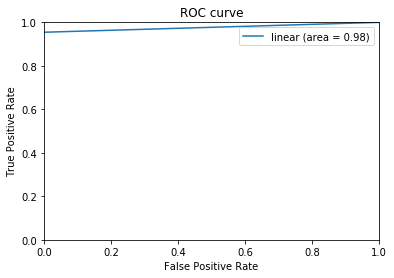

In [14]:
from sklearn.metrics import roc_curve, auc


# Compute the points on the curve
# We pass the probability of the second class (KIA) as the y_score
curve_svm = metrics.roc_curve(y_test, y_predict)

# Compute Area Under the Curve
auc_svm = auc(curve_svm[0], curve_svm[1])

plt.plot(curve_svm[0], curve_svm[1], label='linear (area = %0.2f)' % auc_svm)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();
